In [2]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

In [3]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, pi, trigsimp, dsolve
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [4]:
var("m1 m2 l1 l2 t g")

In [6]:
var("μ_1 μ_2 μ_3 μ_4 μ_5")

In [7]:
q1 = Function("q1")(t)
q2 = Function("q2")(t)
u = Function("u")(t)

In [8]:
q = Matrix([[q1], [q2]])
q.diff(t)

In [6]:
μ1 = (m1 + m2)*l1**2
μ2 = m2*l2**2
μ3 = m2*l1*l2
μ4 = (m1 + m2)*l1
μ5 = m2*l2

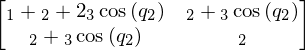

In [9]:
M = (Matrix([[μ_1 + μ_2 + 2*μ_3*cos(q2), μ_2 + μ_3*cos(q2)], [μ_2 + μ_3*cos(q2), μ_2]])).expand()
M

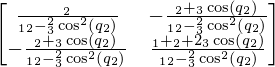

In [10]:
trigsimp(M.inv())

In [11]:
trigsimp(M.det())

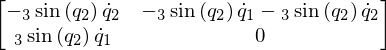

In [13]:
C = (-μ_3*sin(q2)*Matrix([[q2.diff(t), q1.diff(t) + q2.diff(t)], [-q1.diff(t), 0]])).expand()
C

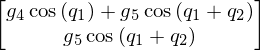

In [14]:
Uq = (g*Matrix([[μ_4*cos(q1) + μ_5*cos(q1 + q2)], [μ_5*cos(q1 + q2)]])).expand()
Uq

In [15]:
G = Matrix([[1], [0]])
G

In [16]:
f = trigsimp(M.inv())*G*u + trigsimp((-trigsimp(M.inv())*C*q.diff(t)).expand()) + trigsimp((-trigsimp(M.inv())*Uq).expand())

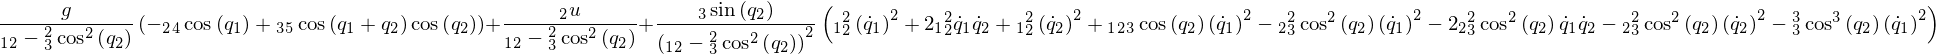

In [17]:
f3 = f[0]
f3

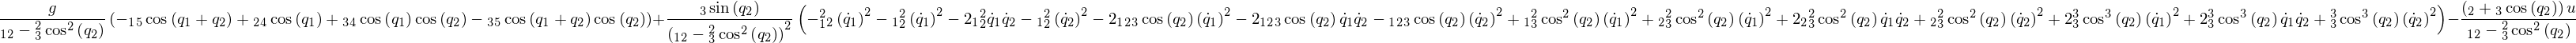

In [18]:
f4 = f[1]
f4

In [19]:
A11 = 0
A12 = 0
A13 = 1
A14 = 0
A21 = 0
A22 = 0
A23 = 0
A24 = 1

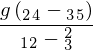

In [21]:
A31 = ((f3.diff(q1)).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A31 = (A31.subs(q1, pi/2)).subs(q2, 0)
A31

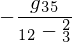

In [22]:
A32 = ((f3.diff(q2)).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A32 = (A32.subs(q1, pi/2)).subs(q2, 0)
A32

In [23]:
A33 = ((f3.diff(q1.diff(t))).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A33 

In [24]:
A34 = ((f3.diff(q2.diff(t))).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A34

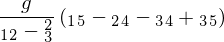

In [25]:
A41 = ((f4.diff(q1)).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A41 = (A41.subs(q1, pi/2)).subs(q2, 0)
A41

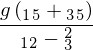

In [26]:
A42 = ((f4.diff(q2)).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A42 = (A42.subs(q1, pi/2)).subs(q2, 0)
A42

In [27]:
A43 = ((f4.diff(q1.diff(t))).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A43

In [28]:
A44 = ((f4.diff(q1.diff(t))).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
A44

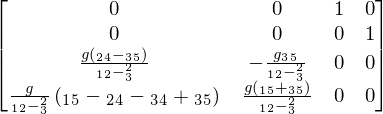

In [29]:
A = Matrix([[A11, A12, A13, A14], [A21, A22, A23, A24], [A31, A32, A33, A34], [A41, A42, A43, A44]])
A

In [30]:
B1 = 0
B2 = 0

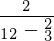

In [31]:
B3 = (f3.diff(u).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
B3 = B3.subs(q2, 0)
B3

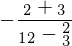

In [32]:
B4 = (f4.diff(u).subs(q1.diff(t), 0)).subs(q2.diff(t), 0)
B4 = B4.subs(q2, 0)
B4

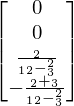

In [33]:
B = Matrix([[B1], [B2], [B3], [B4]])
B

In [4]:
var("t p0")

In [5]:
x1 = Function("x1")(t)
x2 = Function("x2")(t)
p1 = Function("p1")(t)
p2 = Function("p2")(t)
u = Function("u")(t)

$$
\dot{x}_1 = x_2
$$

$$
\dot{x}_2 = -x_2 + u
$$

$$
x(0) =
\begin{pmatrix}
0 \\
0
\end{pmatrix} \quad x(2) = 
\begin{pmatrix}
5 \\
2
\end{pmatrix}
$$

$$
J(u) = \int_0^2 L(x, u) = \int_0^2 \frac{1}{2} u^2(\tau) d\tau
$$

$$
H(x, u, p_1, p_2, p_0) = p_1 \dot{x}_1 + p_2 + \dot{x}_2 + p_0 J(u) = p_1 x_2 - p_2 x_2 + p_2 u + p_0 \frac{1}{2} u^2
$$

$p_0 = -1$

$$
H(x, u, p_1, p_2, p_0) = p_1 x_2 - p_2 x_2 + p_2 u - \frac{1}{2} u^2
$$

In [6]:
ẋ1 = x2
ẋ2 = -x2 + u

In [7]:
ẋ1, ẋ2

In [16]:
L = Rational(1, 2)*u**2
L

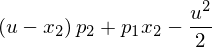

In [17]:
H = p1*ẋ1 + p2*ẋ2 - L
H

In [10]:
ṗ1 = -H.diff(x1)
ṗ2 = -H.diff(x2)

In [11]:
ṗ1, ṗ2

In [12]:
H.diff(u)

In [13]:
u̇ = H.diff(u)
u̇

In [14]:
sol_u = solve(u̇, u)[0]
sol_u

In [15]:
eqs = x1.diff(t) - ẋ1, x2.diff(t) - ẋ2.subs(u, sol_u), p1.diff(t) - ṗ1, p2.diff(t) - ṗ2
eqs

$$
\begin{pmatrix}
\dot{x}_1 \\
\dot{x}_2 \\
\dot{p}_1 \\
\dot{p}_2
\end{pmatrix} =
\begin{pmatrix}
0 & 1 & 0 & 0 \\
0 & -1 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
p_1 \\
p_2
\end{pmatrix}
$$

In [20]:
A = Matrix([[0, 1, 0, 0], [0, -1, 0, 1], [0, 0, 0, 0], [0, 0, -1, 1]])

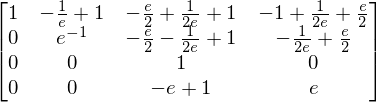

In [21]:
exp(A)

In [19]:
dsolve(eq=eqs)

NotImplementedError: 

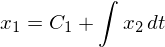

In [98]:
dsolve(x1.diff(t) - ẋ1)

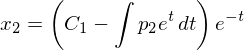

In [97]:
dsolve(x2.diff(t) - ẋ2.subs(u, sol_u))

In [99]:
dsolve(p1.diff(t) - ṗ1)

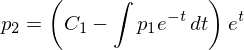

In [100]:
dsolve(p2.diff(t) - ṗ2)